In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#IMPORTS
from fastai.imports import *
from fastai.conv_learner import * 
from fastai.dataset import *

/home/ngj/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
PATH = '../../../data/humanszombies/'

In [4]:
torch.cuda.is_available()

True

In [5]:
torch.backends.cudnn.enabled

True

In [6]:
os.listdir(PATH)

['train', 'valid', 'models', 'tmp', '.git', 'test']

In [7]:
files = os.listdir(f'{PATH}valid/zombies')[:5]

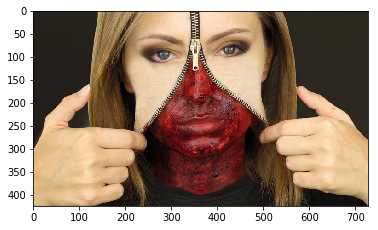

In [8]:
img = plt.imread(f'{PATH}valid/zombies/{files[0]}')
plt.imshow(img)

In [9]:
img.shape

(424, 728, 3)

In [10]:
img[:4,:4]

array([[[37, 34, 29],
        [37, 34, 29],
        [37, 34, 29],
        [37, 34, 29]],

       [[37, 34, 29],
        [37, 34, 29],
        [37, 34, 29],
        [37, 34, 29]],

       [[37, 34, 29],
        [37, 34, 29],
        [37, 34, 29],
        [37, 34, 29]],

       [[37, 34, 29],
        [37, 34, 29],
        [37, 34, 29],
        [37, 34, 29]]], dtype=uint8)

In [11]:
arch=resnet34
size=224

In [12]:
data=ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch,size))
learn=ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.015,7)

epoch      trn_loss   val_loss   accuracy                
    0      0.654695   0.400045   0.798969  
    1      0.493693   0.297184   0.865979                
    2      0.38961    0.325331   0.876289                
    3      0.331812   0.33854    0.860825                
    4      0.283869   0.305987   0.876289                
    5      0.250982   0.293649   0.886598                
    6      0.225982   0.314387   0.865979                



[array([0.31439]), 0.865979381443299]

In [13]:
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
data.classes


['humans', 'zombies']

In [15]:
log_preds=learn.predict()

In [16]:
log_preds.shape

(194, 2)

In [17]:
log_preds[:10]

array([[-0.10354, -2.31909],
       [-0.01985, -3.92925],
       [-0.0004 , -7.82405],
       [-0.86621, -0.54566],
       [-0.12972, -2.10656],
       [-0.02216, -3.82032],
       [-0.00021, -8.47083],
       [-0.71326, -0.67343],
       [-0.00032, -8.05048],
       [-0.43975, -1.03338]], dtype=float32)

In [18]:
preds=np.argmax(log_preds,1)
preds[:10]

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [19]:
probs=np.exp(log_preds[:,1])

In [20]:
probs

array([0.09836, 0.01966, 0.0004 , 0.57946, 0.12166, 0.02192, 0.00021, 0.50996, 0.00032, 0.3558 , 0.30131,
       0.98873, 0.13403, 0.98413, 0.0498 , 0.54053, 0.59907, 0.5538 , 0.0006 , 0.96303, 0.45536, 0.03843,
       0.3055 , 0.00036, 0.7688 , 0.01639, 0.99626, 0.00198, 0.23433, 0.86068, 0.00001, 0.00042, 0.15772,
       0.0002 , 0.00687, 0.00039, 0.00094, 0.89508, 0.00054, 0.9771 , 0.00032, 0.00025, 0.00061, 0.0108 ,
       0.04533, 0.00268, 0.0017 , 0.01495, 0.00788, 0.12098, 0.00019, 0.94142, 0.02244, 0.01864, 0.00008,
       0.20907, 0.00128, 0.01425, 0.15177, 0.14459, 0.0003 , 0.00008, 0.66775, 0.00015, 0.00408, 0.00093,
       0.00238, 0.43166, 0.00067, 0.08037, 0.33265, 0.00241, 0.06639, 0.04757, 0.01493, 0.8156 , 0.00224,
       0.00146, 0.22392, 0.01781, 0.05907, 0.00002, 0.1372 , 0.01628, 0.01776, 0.12932, 0.62723, 0.03033,
       0.24092, 0.00147, 0.00067, 0.05484, 0.22214, 0.23252, 0.03196, 0.16035, 0.00009, 0.01193, 0.54623,
       0.97753, 0.99863, 0.97744, 0.96888, 0.9

In [21]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds==data.val_y)==is_correct)

In [22]:
def plots(titles, ims, figuresize=(12,6), rows=1): 
    fig=plt.figure(figsize=figuresize)
    for x in range(len(ims)):
        sp = fig.add_subplot(rows, len(ims)//rows, x+1)
        if titles is not None: sp.set_title(titles[x], fontsize=16)
        plt.imshow(ims[x])

In [23]:
def load_imgs(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

In [24]:
def plot_val_with_title(idxs, title=None):
    imgs=[load_imgs(data.val_ds, x) for x in idxs]
    prob_titles=[probs[x] for x in idxs]
    print(title)
    return plots(prob_titles, imgs, figuresize=(16,8))

KOREK TELINGA


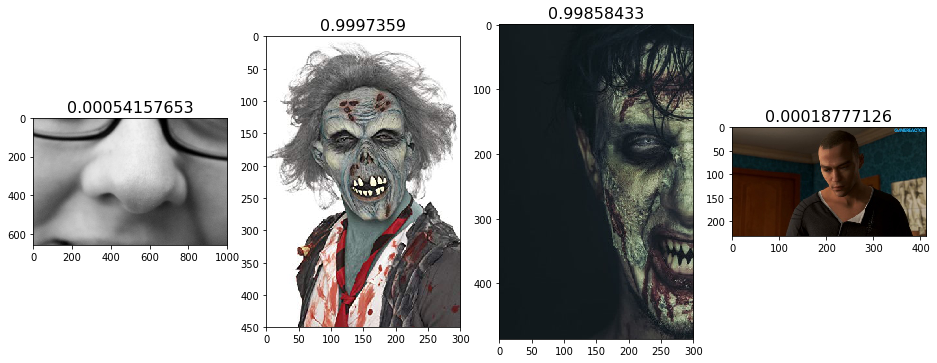

In [25]:
plot_val_with_title(rand_by_correct(True), "KOREK TELINGA")

In [26]:
def most_by_mask(mask, mult):
    idxs=np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

In [27]:
def most_by_correct(y, is_correct):
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds==data.val_y)==is_correct) & (data.val_y==y), mult)

MOZ KOREK ZOMBIES


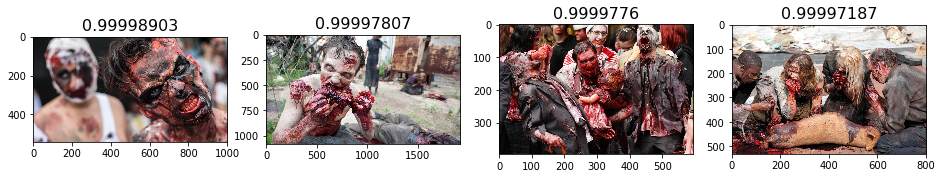

In [28]:
plot_val_with_title(most_by_correct(1, True), "MOZ KOREK ZOMBIES")

MOZ INKOREK ZOMBIES


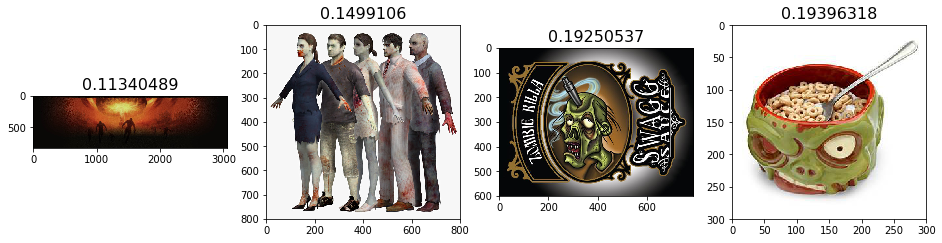

In [29]:
plot_val_with_title(most_by_correct(1, False), "MOZ INKOREK ZOMBIES")

MOZ KOREK HUMANZ


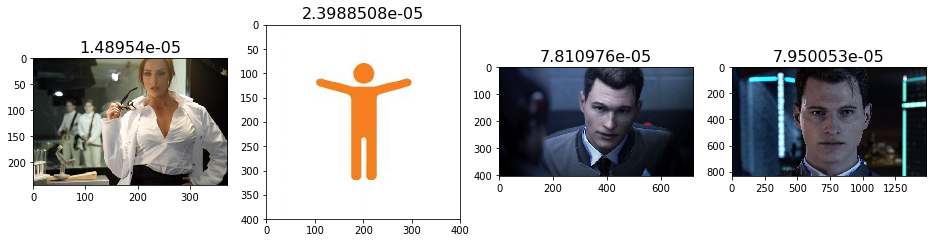

In [30]:
plot_val_with_title(most_by_correct(0, True), "MOZ KOREK HUMANZ")

MOZ INKOREK HUMANZ


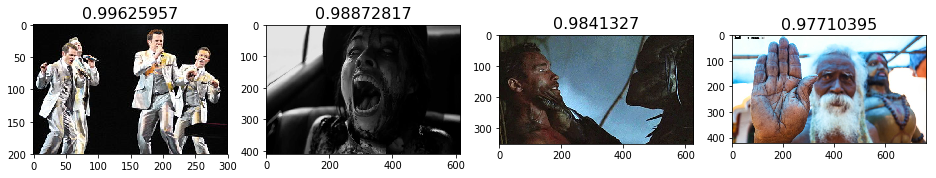

In [31]:
plot_val_with_title(most_by_correct(0, False), "MOZ INKOREK HUMANZ")

MOZ DUNNO


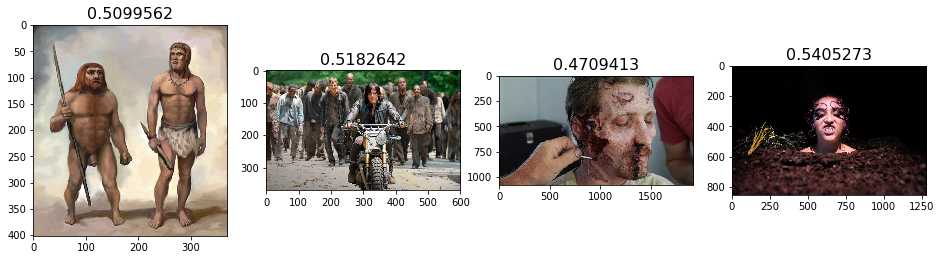

In [32]:
most_uncertain=np.argsort(abs(0.5-probs))[:4]
plot_val_with_title(most_uncertain, "MOZ DUNNO")